In [1]:
import os
import glob
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "D:\\Data_Science\\DS\\4_data\\data\\"
all_path = []
for root, dirs, files in os.walk(path):
    for file in files:
        if(file.endswith(".csv")):
            all_path.append(os.path.join(root,file))
              

In [3]:
all_path

['D:\\Data_Science\\DS\\4_data\\data\\2020-12-03\\Alexey_Smirnov\\data.csv',
 'D:\\Data_Science\\DS\\4_data\\data\\2020-12-03\\Anton_Petrov\\data.csv',
 'D:\\Data_Science\\DS\\4_data\\data\\2020-12-03\\Kirill_Petrov\\data.csv',
 'D:\\Data_Science\\DS\\4_data\\data\\2020-12-03\\Petr_Fedorov\\data.csv',
 'D:\\Data_Science\\DS\\4_data\\data\\2020-12-03\\Vasiliy_Ivanov\\data.csv',
 'D:\\Data_Science\\DS\\4_data\\data\\2020-12-03\\Vasiliy_Petrov\\data.csv',
 'D:\\Data_Science\\DS\\4_data\\data\\2020-12-04\\Alexey_Smirnov\\data.csv',
 'D:\\Data_Science\\DS\\4_data\\data\\2020-12-04\\Kirill_Fedorov\\data.csv',
 'D:\\Data_Science\\DS\\4_data\\data\\2020-12-04\\Petr_Fedorov\\data.csv',
 'D:\\Data_Science\\DS\\4_data\\data\\2020-12-04\\Petr_Ivanov\\data.csv',
 'D:\\Data_Science\\DS\\4_data\\data\\2020-12-04\\Petr_Smirnov\\data.csv',
 'D:\\Data_Science\\DS\\4_data\\data\\2020-12-04\\Rostislav_Fedorov\\data.csv',
 'D:\\Data_Science\\DS\\4_data\\data\\2020-12-04\\Rostislav_Ivanov\\data.csv',
 'D:\\

In [4]:
df = pd.DataFrame(columns=(['product_id', 'quantity']))

for i in range(len(all_path)):
    data_new = pd.read_csv(all_path[i])
    all_data = pd.DataFrame(data = data_new[['product_id', 'quantity']])
    df = df.append(all_data).reset_index(drop = True)
print(df)

    product_id quantity
0           47        1
1           57        1
2           14        2
3           52        1
4            1        4
..         ...      ...
156         66        4
157         39        2
158         82        4
159         74        2
160         54        3

[161 rows x 2 columns]


In [5]:
all_data_df = []

for path in all_path:
    df = pd.read_csv(path, index_col = 0)
    date, name = path.split('\\')[5:7]
    df['name'] = name
    df['date'] = date
    all_data_df.append(df)

In [6]:
data = pd.concat(all_data_df, ignore_index = True)
data

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
156,66,4,Rostislav_Petrov,2020-12-09
157,39,2,Rostislav_Petrov,2020-12-09
158,82,4,Vasiliy_Ivanov,2020-12-09
159,74,2,Vasiliy_Ivanov,2020-12-09


In [7]:
quantity_bought = data.groupby('name').quantity.sum()
quantity_bought

name
Alexey_Fedorov       24
Alexey_Ivanov        17
Alexey_Petrov         7
Alexey_Smirnov       52
Anton_Ivanov         23
Anton_Petrov         18
Anton_Smirnov        45
Kirill_Fedorov       28
Kirill_Petrov         9
Kirill_Smirnov       17
Petr_Fedorov         34
Petr_Ivanov          21
Petr_Petrov          14
Petr_Smirnov         52
Rostislav_Fedorov    16
Rostislav_Ivanov      9
Rostislav_Petrov     28
Rostislav_Smirnov    17
Vasiliy_Fedorov      15
Vasiliy_Ivanov       27
Vasiliy_Petrov        7
Name: quantity, dtype: int64

In [8]:
max_quantity = quantity_bought.max()
max_quantity

52

In [9]:
quantity_bought.loc[(quantity_bought == max_quantity)].index.sort_values()

Index(['Alexey_Smirnov', 'Petr_Smirnov'], dtype='object', name='name')

In [10]:
quantity_bought.loc[(quantity_bought == max_quantity)]

name
Alexey_Smirnov    52
Petr_Smirnov      52
Name: quantity, dtype: int64

In [11]:
data.groupby('name').agg({'quantity':'sum'}).sort_values('quantity', ascending = False)

,quantity
name,
Alexey_Smirnov,52
Petr_Smirnov,52
Anton_Smirnov,45
Petr_Fedorov,34
Kirill_Fedorov,28
Rostislav_Petrov,28
Vasiliy_Ivanov,27
Alexey_Fedorov,24
Anton_Ivanov,23


In [12]:
sum_prod = data.groupby('product_id', as_index = False).agg({'quantity':'sum'})


In [13]:
sum_prod[40:45]

,product_id,quantity
40,54,4
41,55,9
42,56,18
43,57,1
44,61,5


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='product_id', ylabel='quantity'>

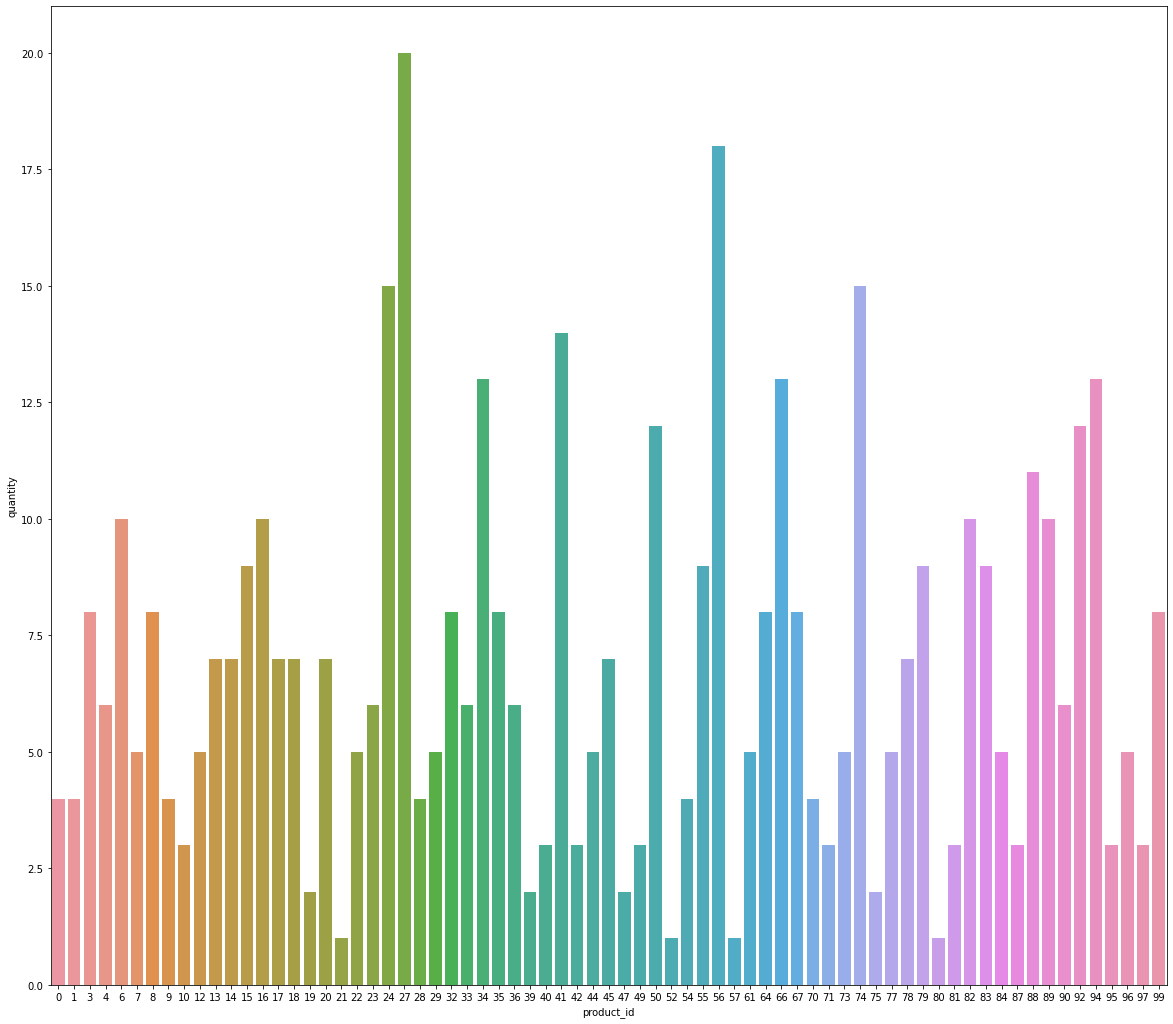

In [15]:
plt.figure(figsize=(20, 18))
sns.barplot(x = 'product_id', y = 'quantity', data = sum_prod)


<AxesSubplot:xlabel='date', ylabel='quantity'>

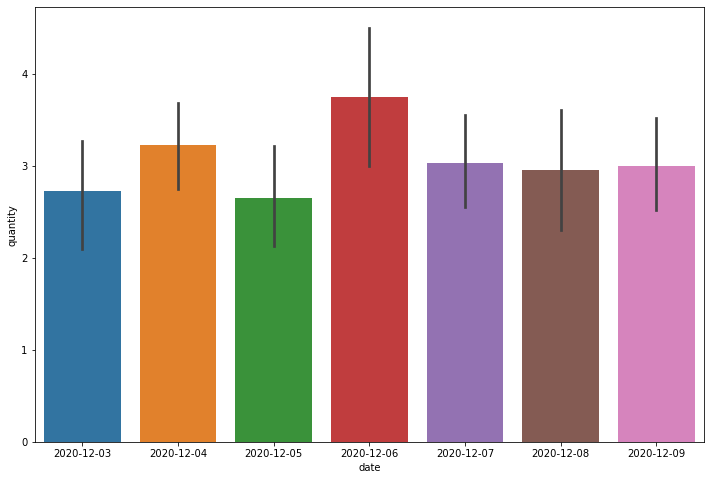

In [16]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'date', y = 'quantity', data = data)

In [17]:
data

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
156,66,4,Rostislav_Petrov,2020-12-09
157,39,2,Rostislav_Petrov,2020-12-09
158,82,4,Vasiliy_Ivanov,2020-12-09
159,74,2,Vasiliy_Ivanov,2020-12-09


In [18]:
data = data.drop_duplicates(subset = ['product_id', 'date', 'name'])
data

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
156,66,4,Rostislav_Petrov,2020-12-09
157,39,2,Rostislav_Petrov,2020-12-09
158,82,4,Vasiliy_Ivanov,2020-12-09
159,74,2,Vasiliy_Ivanov,2020-12-09


In [19]:
data =data.groupby(['name','product_id'], as_index = False).agg({'date':'count'})
data

,name,product_id,date
0,Alexey_Fedorov,13,1
1,Alexey_Fedorov,15,1
2,Alexey_Fedorov,18,1
3,Alexey_Fedorov,34,1
4,Alexey_Fedorov,50,1
...,...,...,...
153,Vasiliy_Ivanov,83,1
154,Vasiliy_Ivanov,94,1
155,Vasiliy_Ivanov,95,1
156,Vasiliy_Petrov,27,1


In [20]:
for i in range(len(data.date)):
    if data.date[i]>1:
        print(i) #выведет индексы ребят, которые купили больше одного раза

37
92


In [21]:
c = 0
for i in range(len(data.date)):
    if data.date[i]>1:
        c+=1 #выведет количество ребят, купившие больше одного раза
print(c)

2


In [22]:
transaction = pd.read_csv("\\Data_Science\\DS\\transaction_data.csv")

In [23]:
data = transaction.groupby('transaction', as_index = False).agg({'name':'count'})
data

,transaction,name
0,cancelled,1619
1,error,4
2,successfull,3692


<AxesSubplot:xlabel='name', ylabel='transaction'>

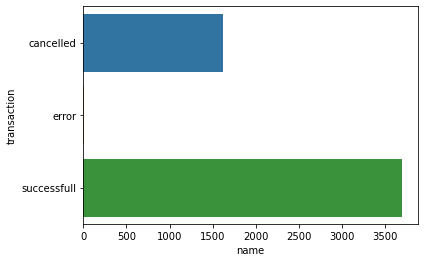

In [24]:
sns.barplot(x = data.name, y = data.transaction, data = data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

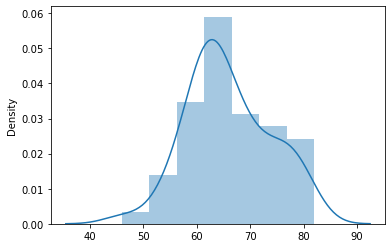

In [25]:
suctr = transaction.query('transaction == "successfull"').groupby('name', as_index = False).agg({'transaction':'count'}).rename(columns = {'transaction':'succ'})
sns.distplot(x = suctr.succ)

In [26]:
df = pd.read_csv("\\Data_Science\\DS\\transaction_data_updated.csv")

In [27]:
user_vs_minute_pivot = df.groupby(['minute','name'], as_index = False).agg({'transaction':'count'}).\
pivot(index='minute',columns='name', values='transaction').fillna(0)
user_vs_minute_pivot

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,3.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0


<AxesSubplot:xlabel='minute', ylabel='trans_num'>

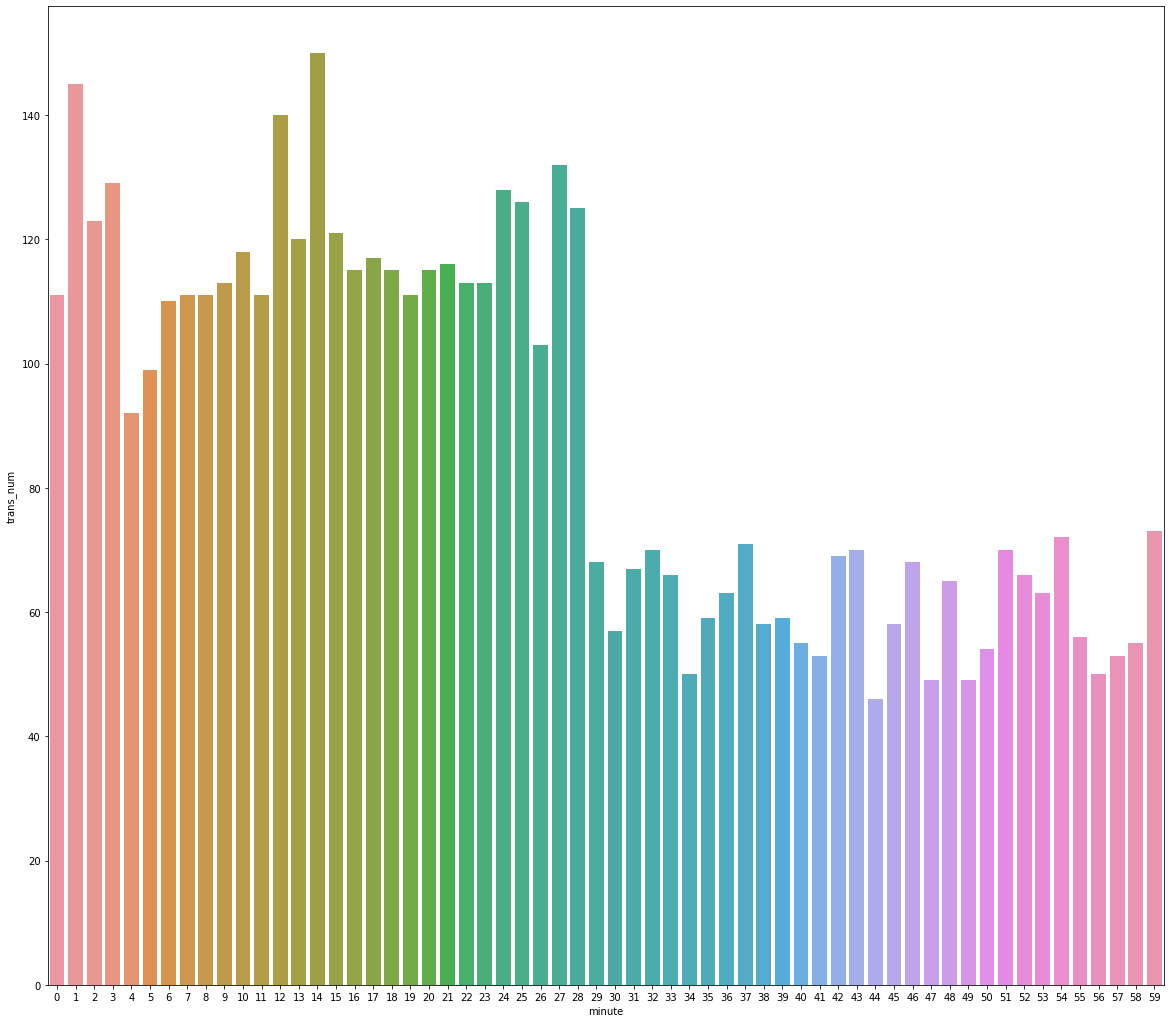

In [28]:
df2 = df.groupby('minute', as_index = False).agg({'transaction':'count'}).rename(columns = {'transaction':'trans_num'})
plt.figure(figsize=(20, 18))
sns.barplot(x = 'minute', y = 'trans_num', data = df2)

In [29]:
df_logs = pd.read_csv('\\Data_Science\\DS\\3_logs.csv')
df_users = pd.read_csv('\\Data_Science\\DS\\3_user_data.csv')
total = df_logs.merge(df_users, on = 'client')

In [30]:
success= total.query('success==True').groupby('client', as_index = False).\
agg({'success': 'count'}).sort_values('success', ascending = False).\
rename(columns = {'success':'purchaces'}).query('purchaces == 41').sort_values('client')

In [31]:
success

,client,purchaces
250,12179,41
588,28719,41
737,36165,41
1084,52870,41
1279,61468,41
1280,61473,41
1636,78349,41
1716,82563,41
1933,92584,41


In [32]:
lst = []
for i in success.client:
    lst.append(i)
print(lst, sep = ',')

#query('success == 41').sort_values('client', ascending = False)

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]


In [33]:
 total.query('success== True').groupby('client', as_index = False).agg({'success':'sum'}).sort_values('success')

,client,success
0,40,1
1400,67120,1
1399,67106,1
1398,67049,1
1397,67030,1
...,...,...
737,36165,41
588,28719,41
1084,52870,41
1716,82563,41


In [34]:
total.groupby('platform', as_index=False).agg({'client':'sum'}).sort_values('client', ascending = False)

,platform,client
1,phone,109638811
0,computer,58729655
2,tablet,9102991


In [35]:
total.query('premium == True').groupby('platform', as_index=False).agg({'client':'count'}).sort_values('client', ascending = False)

,platform,client
1,phone,246
0,computer,150
2,tablet,24


In [36]:
age_status = total.groupby('premium', as_index = False).agg({'client':'count'}).sort_values('client', ascending = False)
age_status

,premium,client
0,False,3019
1,True,420


In [37]:
total.query('premium==True').groupby('age', as_index = False).agg({'client':'count'}).sort_values('client', ascending = False).rename(columns = {'client':'num_of_clients'})

,age,num_of_clients
5,25,17
37,57,15
15,35,14
44,64,13
39,59,12
16,36,11
34,54,11
41,61,11
9,29,11
7,27,11


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

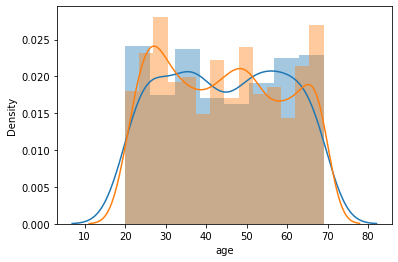

In [38]:
total1 = total.query('premium==True')
total2 = total.query('premium==False')
sns.distplot(total1.age)
sns.distplot(total2.age)

In [39]:
success_oper =  total.query('success== True').groupby('client', as_index = False).agg({'success':'count'}).sort_values('success').rename(columns = {'client':'client_id', 'success':'number_of_suc_purch'})
success_oper

,client_id,number_of_suc_purch
0,40,1
1400,67120,1
1399,67106,1
1398,67049,1
1397,67030,1
...,...,...
737,36165,41
588,28719,41
1084,52870,41
1716,82563,41


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number_of_suc_purch', ylabel='Density'>

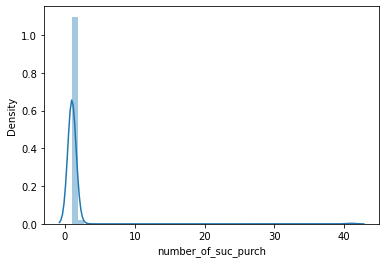

In [40]:
sns.distplot(success_oper.number_of_suc_purch)

In [41]:
gr = total.loc[(total.platform == 'computer')&(total.success == True)]
gr

,client,success,platform,time,premium,age
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
7,61468,True,computer,1585416826,False,25
11,61468,True,computer,1585428874,False,25
...,...,...,...,...,...,...
3409,4293,True,computer,1585403129,False,29
3425,16540,True,computer,1585456144,False,49
3432,85769,True,computer,1585447052,False,46
3433,81031,True,computer,1585401631,False,45


In [49]:
data = pd.read_csv("\\Data_Science\\DS\\avocado_mean.csv")

In [50]:
sns.set(
    font_scale =2,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,7)}
)

In [51]:
price = data.AveragePrice.rolling(3).mean().max()

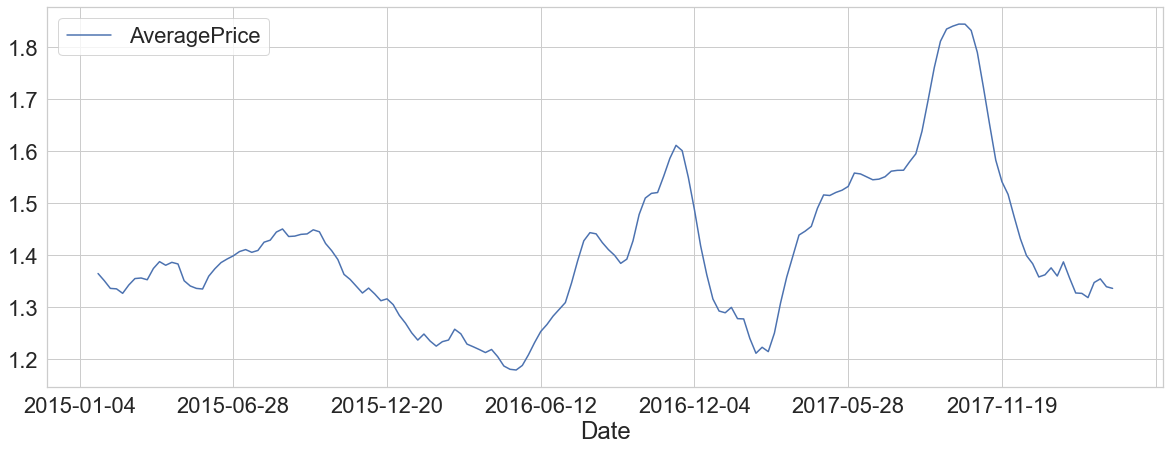

In [52]:
win4 = pricebydate = data.groupby('Date').agg({'AveragePrice':'mean'}).rolling(4).mean().plot()


In [53]:
data.astype({'AveragePrice': 'int64'}).dtypes

Date            object
AveragePrice     int64
dtype: object

In [54]:
win10=pricebydate = data.groupby('Date').agg({'AveragePrice':'mean'}).rolling(10).mean()


In [55]:
win50=pricebydate = data.groupby('Date').agg({'AveragePrice':'mean'}).rolling(50).mean()


In [56]:
avocado_mean = data.groupby('Date').agg({'AveragePrice':'mean'})

In [57]:
avocado_ewm = avocado_mean.ewm(span = 2)

<AxesSubplot:xlabel='Date'>

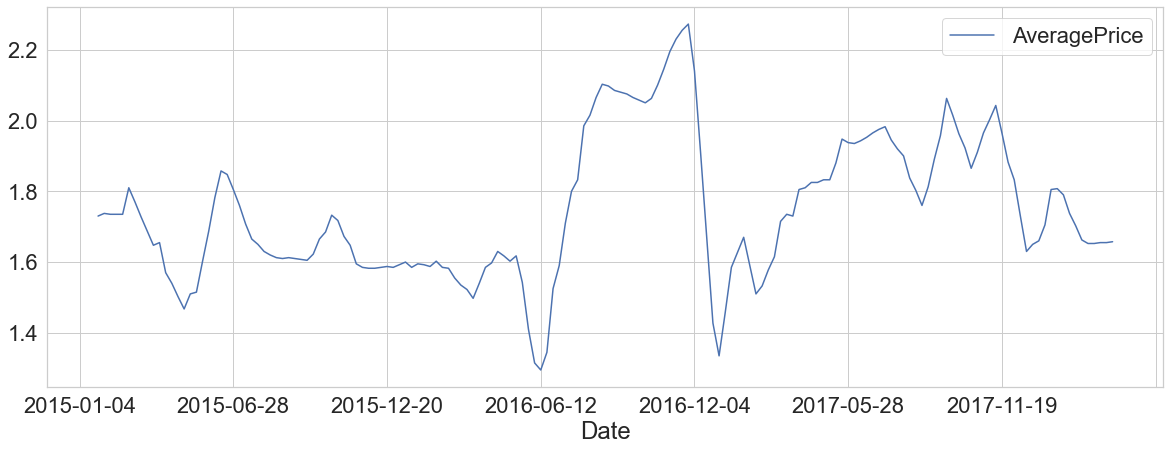

In [58]:
df = pd.read_csv("\\Data_Science\\DS\\avocado_full.csv", index_col=0)
df.query('region=="Chicago" & type == "organic"').groupby('Date').agg({'AveragePrice':'mean'}).rolling(4).mean().plot()

<AxesSubplot:xlabel='Date'>

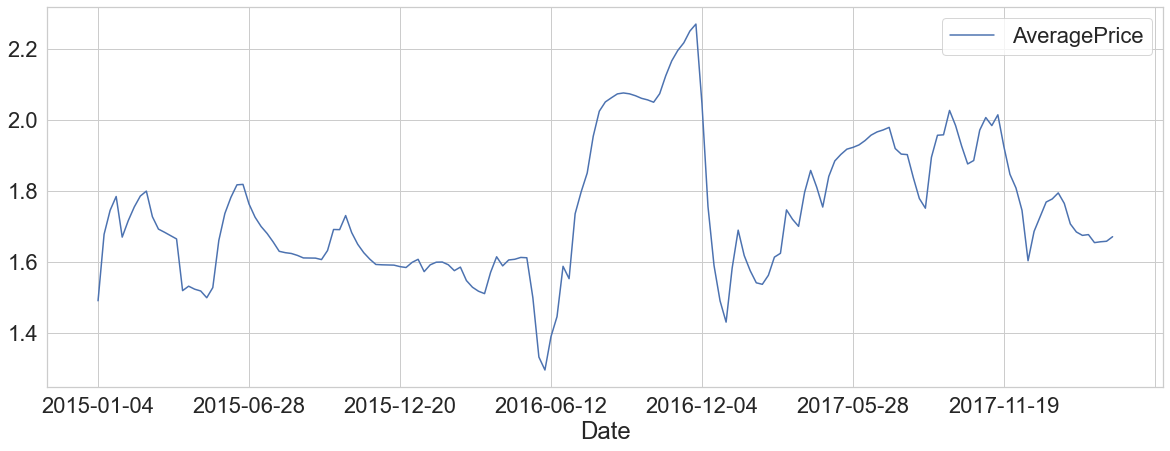

In [59]:
df.query('region=="Chicago" & type == "organic"').groupby('Date').agg({'AveragePrice':'mean'}).ewm(span = 4).mean().plot()

In [60]:
df = pd.read_csv("\\Data_Science\\DS\\delays.csv")
for i in df.delay:
    if i.startswith('-'):
        df.delay = df.delay.str.replace('-', '')

In [61]:
df['delay'] =  pd.to_timedelta(df.delay)
 #df.date.dt'de.strftime('%d/%m/%y %H:%M')

In [62]:
df['delay_categorical'] = pd.cut(df.delay, bins = 4, labels=['less than 1 day', '1-2 days', '2-3 days', 'more than 3 days'])
df.delay = pd.to_timedelta([i for i in df.delay])


In [63]:
df['delay_categorical'] = pd.cut(df.delay, pd.to_timedelta(['0s', '1d', '2d', '3d', '5d']),
                                         labels=['less than 1 day', '1-2 days', '2-3 days', 'more than 3 days'])
df

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1-2 days
1,7614,9544,4 days 02:14:23,859266,more than 3 days
2,2052,2427,0 days 06:08:57,812416,less than 1 day
3,9635,8054,0 days 23:40:19,162312,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1-2 days
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,less than 1 day
260,2384,2364,3 days 23:27:14,910660,more than 3 days
261,5146,3331,1 days 15:22:34,401137,1-2 days
262,7203,5532,2 days 17:15:02,308979,2-3 days


In [65]:
taxi = pd.read_csv(('\\Data_Science\\DS\\3_taxi_peru.csv'), sep = ';')
taxi[['start_at','end_at', 'arrived_at']] = taxi[['start_at','end_at', 'arrived_at']].apply(pd.to_datetime)
taxi = taxi.query("start_type == 'asap' or start_type == 'reserved'")

In [66]:
taxi['wait_time']=(taxi.arrived_at - taxi.start_at).astype('timedelta64[m]')
taxi['month'] = taxi['start_at'].dt.month
taxi['month']

0        11
1         6
2         5
3         6
4         9
         ..
23106     7
23107    10
23108     9
23109     4
23110     3
Name: month, Length: 23091, dtype: int64

In [67]:
taxi['week'] = taxi['start_at'].dt.strftime('%A')
taxi['week']

0         Tuesday
1         Tuesday
2          Monday
3         Tuesday
4        Saturday
           ...   
23106    Saturday
23107    Saturday
23108     Tuesday
23109    Thursday
23110     Tuesday
Name: week, Length: 23091, dtype: object

In [68]:
taxi.groupby('month', as_index = False).agg({'journey_id':'count'}) 


,month,journey_id
0,1,573
1,2,766
2,3,983
3,4,1445
4,5,1584
5,6,1936
6,7,1512
7,8,2120
8,9,2598
9,10,3240


<AxesSubplot:xlabel='month', ylabel='count'>

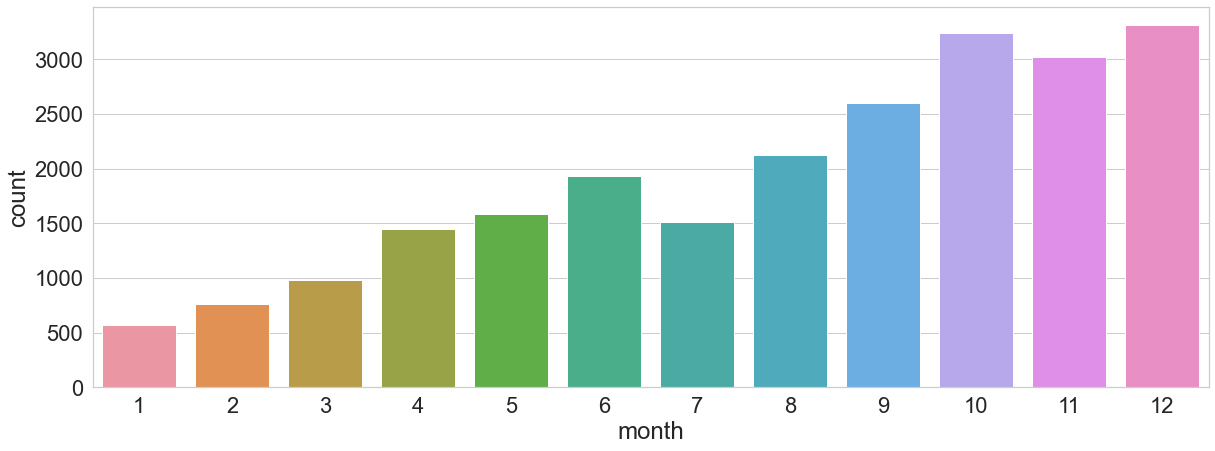

In [69]:
sns.countplot(x ='month' , data = taxi)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='week', ylabel='count'>

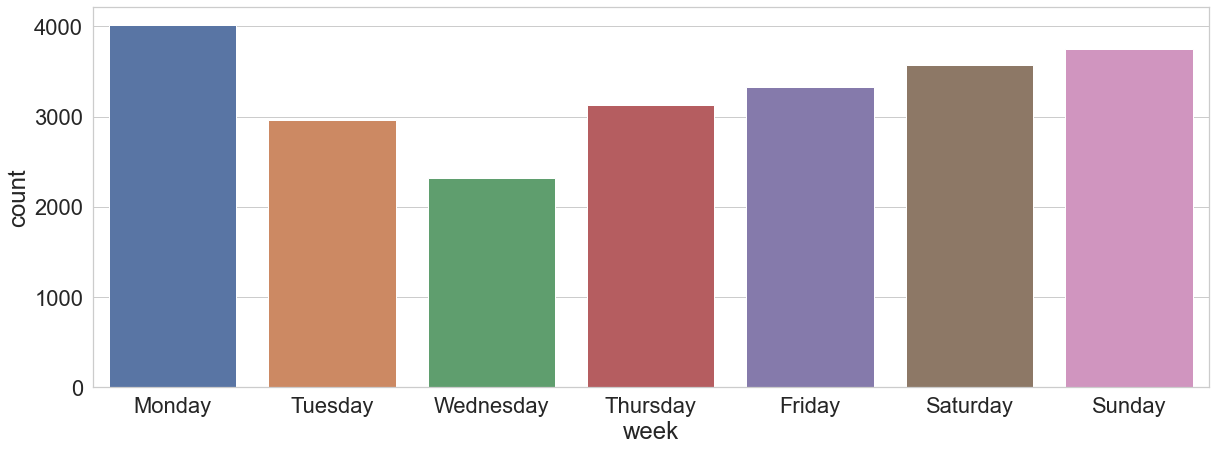

In [70]:
sns.countplot(taxi['week'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='week', ylabel='count'>

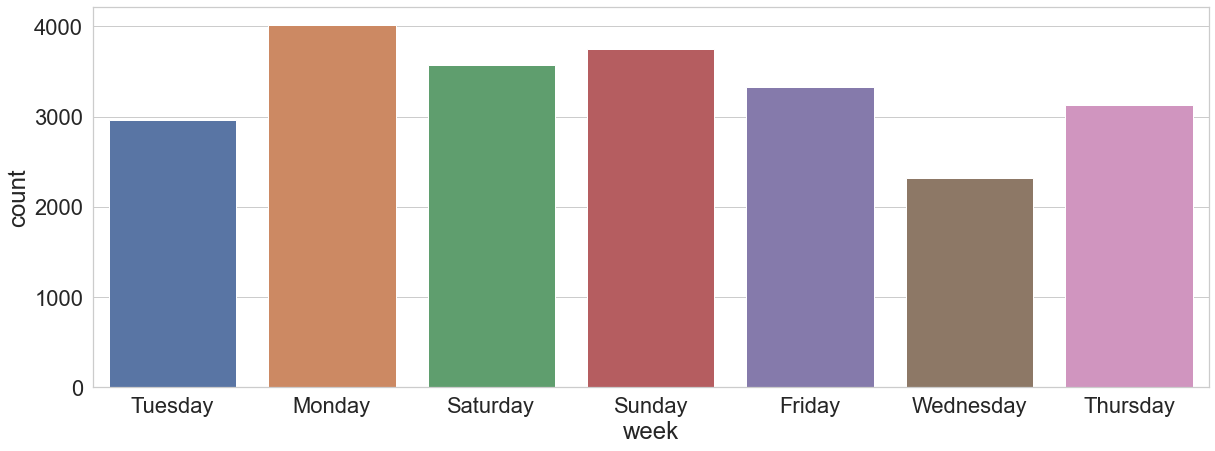

In [71]:
sns.countplot(taxi['week'])

<AxesSubplot:>

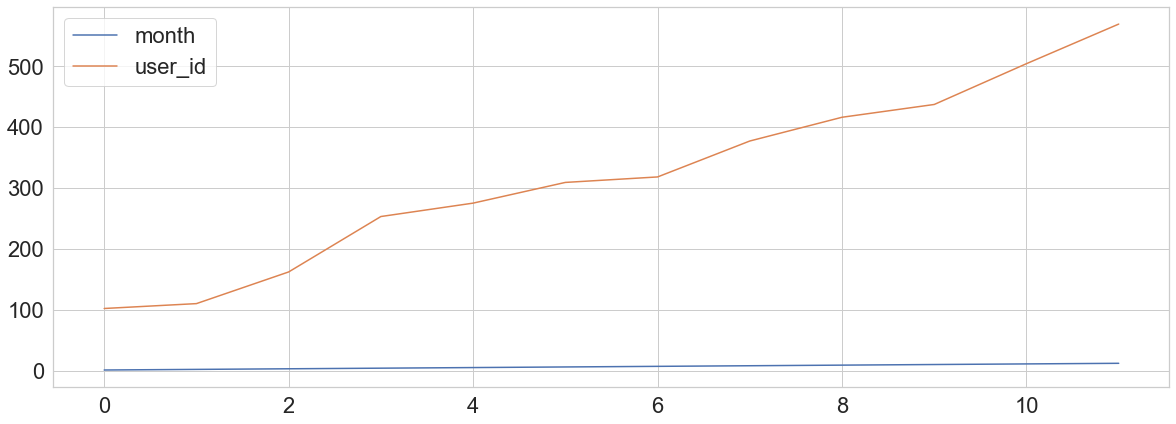

In [72]:
last = taxi.groupby(['month'], as_index = False).user_id.nunique()
last.plot.line()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='user_id'>

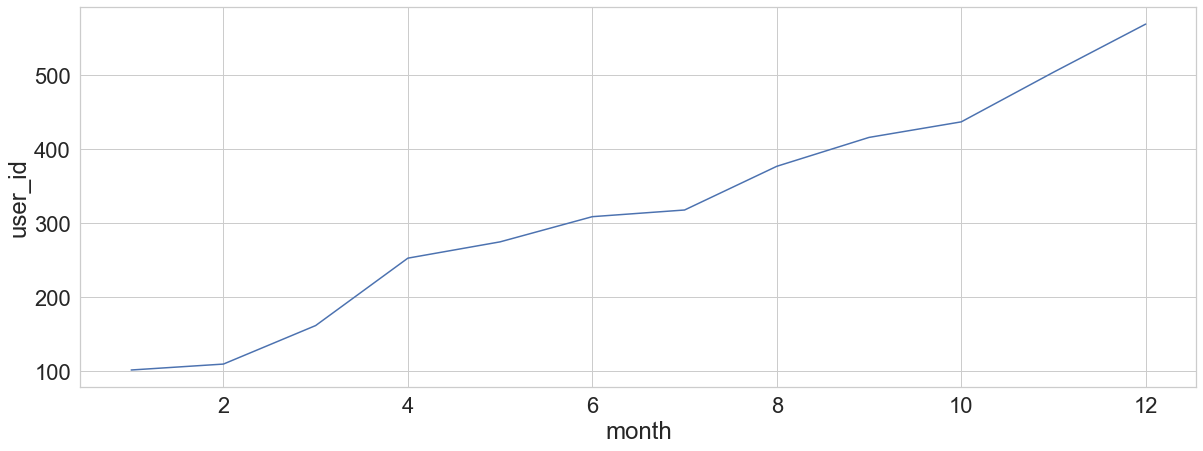

In [73]:
sns.lineplot(last.month, last.user_id)